In [64]:

import sys
import librosa
from IPython.display import Audio
sys.path.append('../')

import librosa.display
import matplotlib.pyplot as plt
import numpy as np


from vocal_patterns.ml_logic.data import get_manual_test_data, get_data


In [33]:
def plot_spectrogram_librosa(waveform, sr, ax):
    # Compute the spectrogram
    Sxx = librosa.feature.melspectrogram(y=waveform, sr=sr)
    # Convert to dB scale
    Sxx_db = librosa.power_to_db(Sxx, ref=np.max)
    # Plot the spectrogram
    librosa.display.specshow(Sxx_db, sr=sr, x_axis='time', y_axis='mel')
    # ax.colorbar(format='%+2.0f dB')
    return ax
    

In [136]:
data = get_data()
data.head()
recordings = get_manual_test_data()
recordings.head()


data_selector = 100

data_scales = data[data['exercise'] == "scales"].iloc[data_selector + 15: data_selector + 30]
data_arpeggios = data[data['exercise'] == "arpeggios"].iloc[data_selector + 15: data_selector + 30]
recordings_arp = recordings[recordings['exercise'] == "arpeggios"].head(15)
recordings_scales = recordings[recordings['exercise'] == "scales"].head(15)

# print(data_scales_avg_length)
# print(data_arpeggios_avg_length)



,path,exercise,technique,filename
0,/Users/jake/code/jchaselubitz/vocal_patterns/d...,arpeggios,slow_piano,f7_arpeggios_f_slow_piano_u.wav
1,/Users/jake/code/jchaselubitz/vocal_patterns/d...,scales,fast_forte,m8_scales_f_fast_forte_i.wav
2,/Users/jake/code/jchaselubitz/vocal_patterns/d...,arpeggios,slow_forte,m9_arpeggios_c_slow_forte_o.wav
3,/Users/jake/code/jchaselubitz/vocal_patterns/d...,arpeggios,slow_piano,f4_arpeggios_c_slow_piano_a.wav
4,/Users/jake/code/jchaselubitz/vocal_patterns/d...,arpeggios,fast_piano,m6_arpeggios_c_fast_piano_o.wav


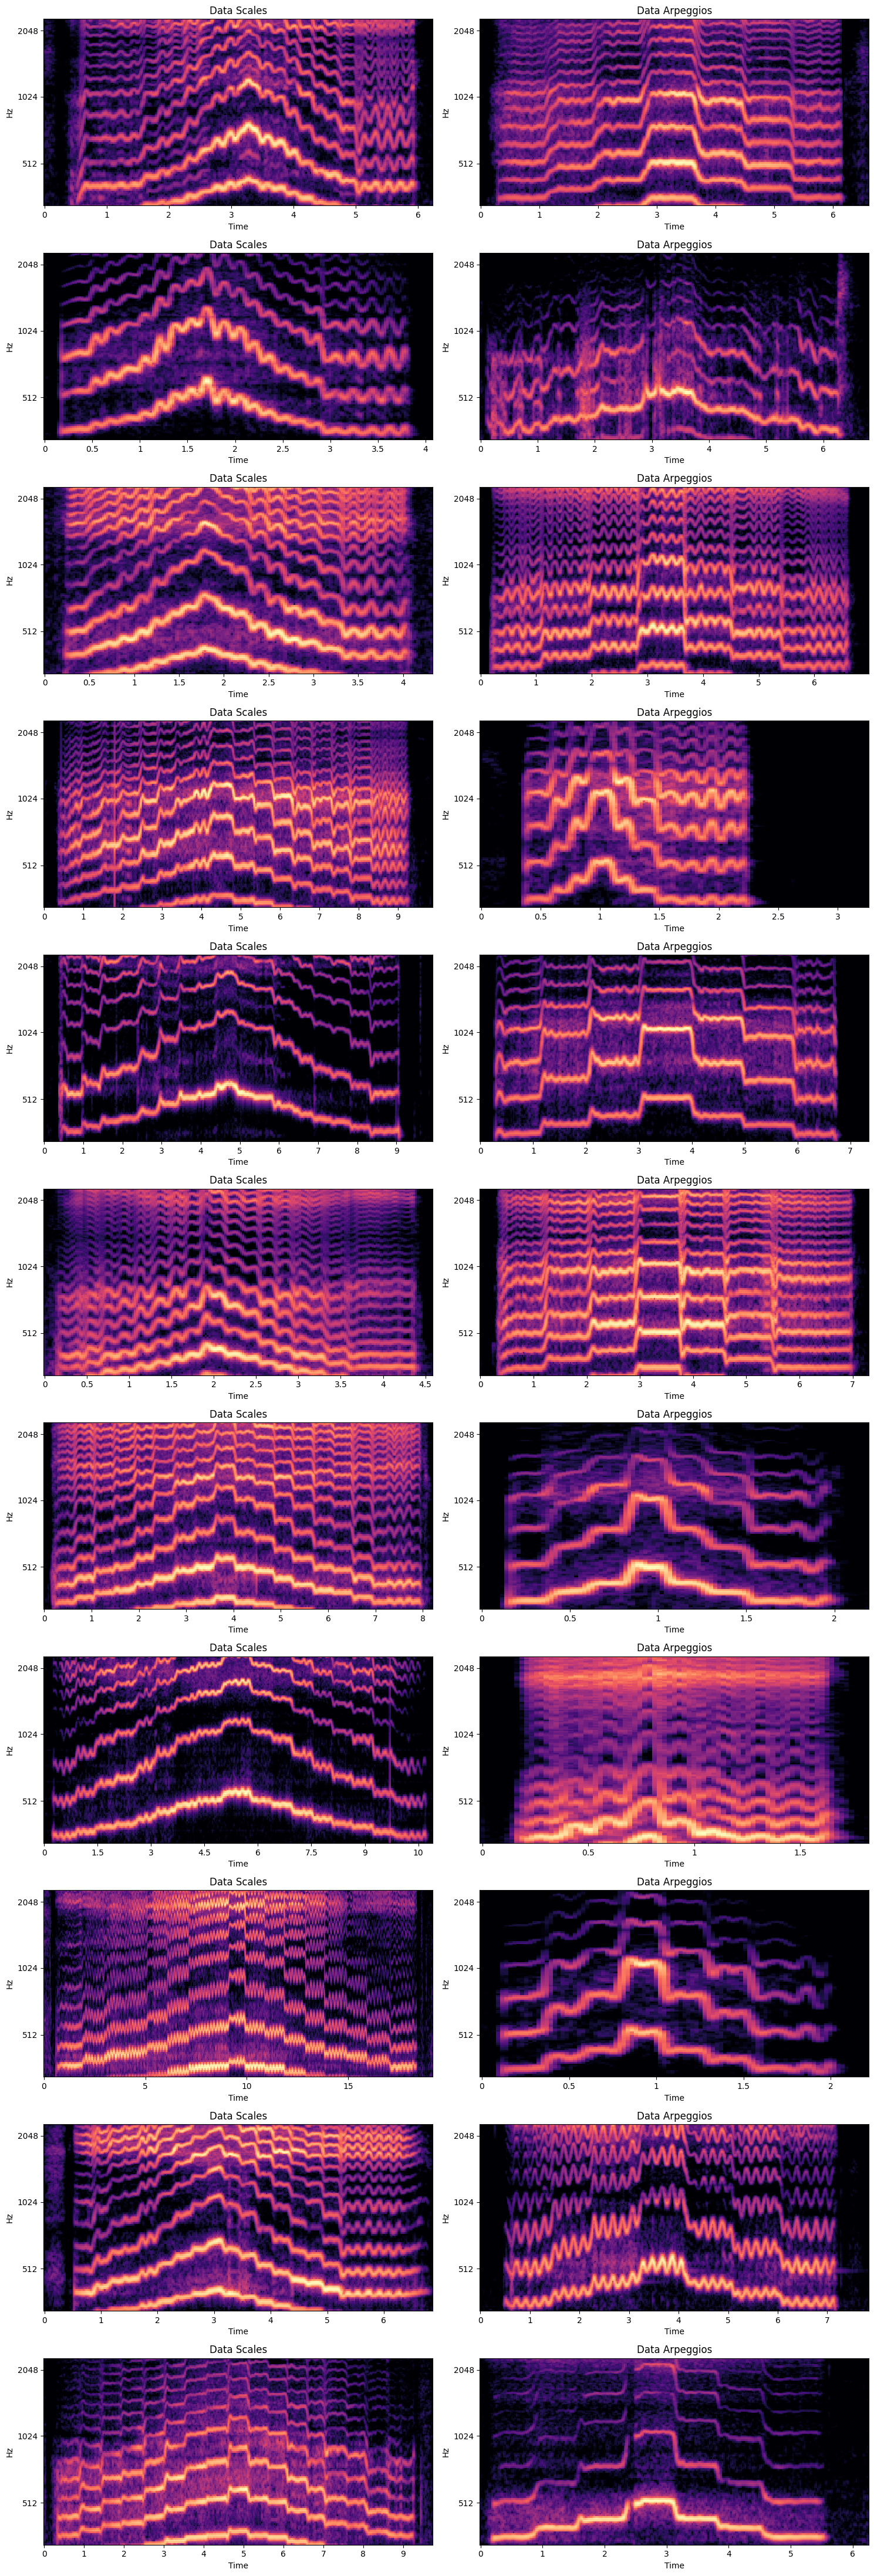

In [151]:
from vocal_patterns.ml_logic.preprocessor import add_background_noise, clip_margins, noise_up_waveform, reduce_noise


rows = 11

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 4*rows))
sr = 22050

def display_spectrogram(waveform, sr, ax):
    fmin = 200
    fmax = 2300
    # Compute the spectrogram
    # waveform = reduce_noise(waveform)
    # waveform = clip_margins(waveform, margin_percent=15)
    # waveform = noise_up_waveform(waveform, noise_level=0.001)
    # waveform, sr = add_background_noise(
    #                 waveform, sr, noise_level=0.5
    #             )
    Sxx = librosa.feature.melspectrogram(y=waveform, sr=sr, fmin=fmin, fmax=fmax)
    Sxx_db = librosa.power_to_db(Sxx, ref=np.max)
    librosa.display.specshow(Sxx_db, sr=sr, x_axis='time', y_axis='mel', ax=ax, fmin=fmin, fmax=fmax)
    return ax
 

# Iterate over each row
for i in range(rows):
    # Plot data_scales
    axes[i, 0].set_title('Data Scales')
    file = data_scales['path'].iloc[i]
    waveform, sr = librosa.load(file, sr=sr, mono=True)
    display_spectrogram(waveform, sr, axes[i, 0])
    

    # Plot data_arpeggios
    axes[i, 1].set_title('Data Arpeggios')
    file = data_arpeggios['path'].iloc[i]
    waveform, sr = librosa.load(file, sr=sr, mono=True)
    display_spectrogram(waveform, sr, axes[i, 1])
    

    # # Plot recordings_arp
    # axes[i, 0].set_title(recordings_arp['filename'].iloc[i])
    # file = recordings_arp['path'].iloc[i]
    # waveform, sr = librosa.load(file, sr=sr, mono=True)
    # display_spectrogram(waveform, sr, axes[i, 0])
    
    # axes[i, 1].set_title(recordings_scales['filename'].iloc[i])
    # file = recordings_scales['path'].iloc[i]
    # waveform, sr = librosa.load(file, sr=sr, mono=True)
    # display_spectrogram(waveform, sr, axes[i, 1])
    
    

plt.tight_layout()
plt.show()
